In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
%matplotlib inline

In [2]:
links = pd.read_csv(r"ml-latest-small/links.csv") #Links show Movie ID, IMDB ID, and TMDB ID
movies = pd.read_csv(r"ml-latest-small/movies.csv") #Movies Show Movie ID, Title, Genres
ratings = pd.read_csv(r"ml-latest-small/ratings.csv") #Ratings show userid, movieid, ratings, and timestamps (Can we apply a flocking algorithm?)
tags = pd.read_csv(r"ml-latest-small/tags.csv") #User ID, Movie ID, Tag, and Timestamp
print(tags.shape)
tags.timestamp = tags.apply(lambda x : datetime.strptime(time.ctime(x.timestamp),"%a %b %d %H:%M:%S %Y"), axis = 1)
ratings.timestamp = ratings.apply(lambda x : datetime.strptime(time.ctime(x.timestamp),"%a %b %d %H:%M:%S %Y"), axis = 1)
print("links", links.shape) 
print("movies", movies.shape)
print("ratings", ratings.shape)
print("tags", tags.shape)
#What do we need to do? / Basic Ideas
# 1. Can we identify trend setters?
# 2. Create node visual for genre clusters (20 Genres, which tend to cluster together)
# 3. Identify associations in tags

(3683, 4)
links (9742, 3)
movies (9742, 3)
ratings (100836, 4)
tags (3683, 4)


In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# import re
# movies.dropna
# movies['Release_Year'] = 0
# for index, row in movies.iterrows():
#     try:
#         movies.loc[index, "Release_Year"] = re.search(r'\((.*?)\)',row["title"]).groups(1)[0]
#     except:
#         movies.loc[index, "Release_Year"] = "NaN"

In [6]:
#Probably a better Idea to get release date form imdb database
#First let's get an idea of what we want to show with the date data
# movies.Release_Year.unique()

In [7]:
#Data Range Between 1996-2018
#we likely want to look at this table for the flocking algorithm
#an interaction between users will be classified as an interaction
#over similar movie ratings (10,000 movies and 100,000 ratings)
print("Min Time: ", min(ratings.timestamp))
print("Max Time: ", max(ratings.timestamp))
print("Number of users: ", ratings.userId.nunique())
print("Average # of Ratings per User: ", np.mean(list(ratings.userId.value_counts())))
print("Median # of Ratings per User: ", np.median(list(ratings.userId.value_counts())))
print("Average Ratings per Movie: ", ratings.groupby(by = "movieId", axis = 0).sum().rating.mean())
print("Median # of Ratings per Movie", ratings.groupby(by = "movieId", axis = 0).sum().rating.median())
print("rating min: ", min(ratings.rating))
print("rating max: ", max(ratings.rating))
print("Unique Rating Possibilities: ", ratings.rating.unique())
ratings.head()

Min Time:  1996-03-30 02:36:55
Max Time:  2018-09-24 22:27:30
Number of users:  610
Average # of Ratings per User:  165.30491803278687
Median # of Ratings per User:  70.5
Average Ratings per Movie:  36.310468942821885
Median # of Ratings per Movie 8.5
rating min:  0.5
rating max:  5.0
Unique Rating Possibilities:  [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-31 02:45:03
1,1,3,4.0,2000-07-31 02:20:47
2,1,6,4.0,2000-07-31 02:37:04
3,1,47,5.0,2000-07-31 03:03:35
4,1,50,5.0,2000-07-31 02:48:51


In [8]:
ratings.groupby(by = "movieId", axis = 0).sum().rating.median()

8.5

In [9]:
tags.groupby(by = "movieId", axis = 0).count().tag.mean()

2.3428753180661577

In [10]:
# print(tags.tag.nunique()) #1589 Unique Tags
#Data Tags Range from 2006 to 2018
print(type(tags.timestamp[0]))
print("Min Time:", tags.timestamp.min())
print("Max Time:", tags.timestamp.max())
print("number of users", tags.userId.nunique())
print("Average Number of Tags per Movie:", tags.groupby(by = "movieId", axis = 0).count().tag.mean())
print("Median Number of Tags per Movie:", tags.groupby(by = "movieId", axis = 0).count().tag.median()) #Median Tag Number is 1
tags.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Min Time: 2006-01-14 03:09:12
Max Time: 2018-09-16 19:50:03
number of users 58
Average Number of Tags per Movie: 2.3428753180661577
Median Number of Tags per Movie: 1.0


,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-25 03:29:54
1,2,60756,Highly quotable,2015-10-25 03:29:56
2,2,60756,will ferrell,2015-10-25 03:29:52
3,2,89774,Boxing story,2015-10-25 03:33:27
4,2,89774,MMA,2015-10-25 03:33:20


In [11]:
#Getting unique genres and unique tags
import collections
genre_dict = {}
for entry in movies.genres:
    temp = entry.split('|')
    for j in temp:
        try:
            genre_dict[j] += 1
        except:
            genre_dict[j] = 1
            
genre_dict = collections.OrderedDict(sorted(genre_dict.items(), key=lambda x:x[1]))
print(genre_dict.values())
print(genre_dict.keys())

odict_values([34, 87, 158, 167, 334, 382, 440, 573, 611, 664, 779, 978, 980, 1199, 1263, 1596, 1828, 1894, 3756, 4361])
odict_keys(['(no genres listed)', 'Film-Noir', 'IMAX', 'Western', 'Musical', 'War', 'Documentary', 'Mystery', 'Animation', 'Children', 'Fantasy', 'Horror', 'Sci-Fi', 'Crime', 'Adventure', 'Romance', 'Action', 'Thriller', 'Comedy', 'Drama'])


Length: 20


(-1.101904743349182,
 1.1163828500180555,
 -1.1024517392200537,
 1.1001167576325557)

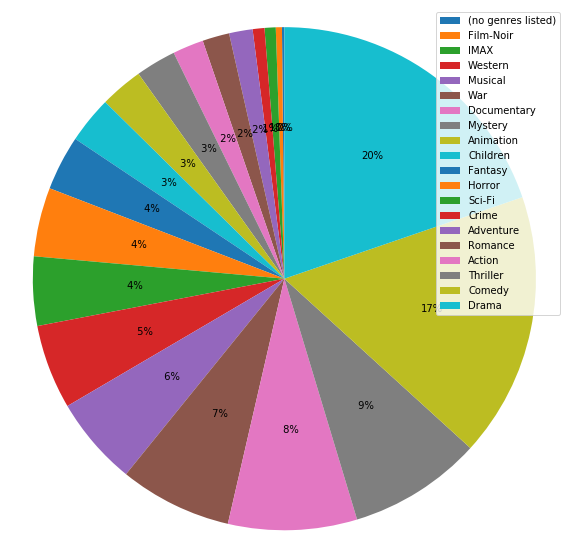

In [12]:
#Graph Distribution

print("Length:", len(genre_dict))
plt.figure(figsize=(10,10))
patches, texts, autotext = plt.pie(genre_dict.values(),  autopct='%2.0f%%', startangle=90)
plt.legend(patches, genre_dict.keys(), loc="best")
# plt.tight_layout()
plt.axis('equal')


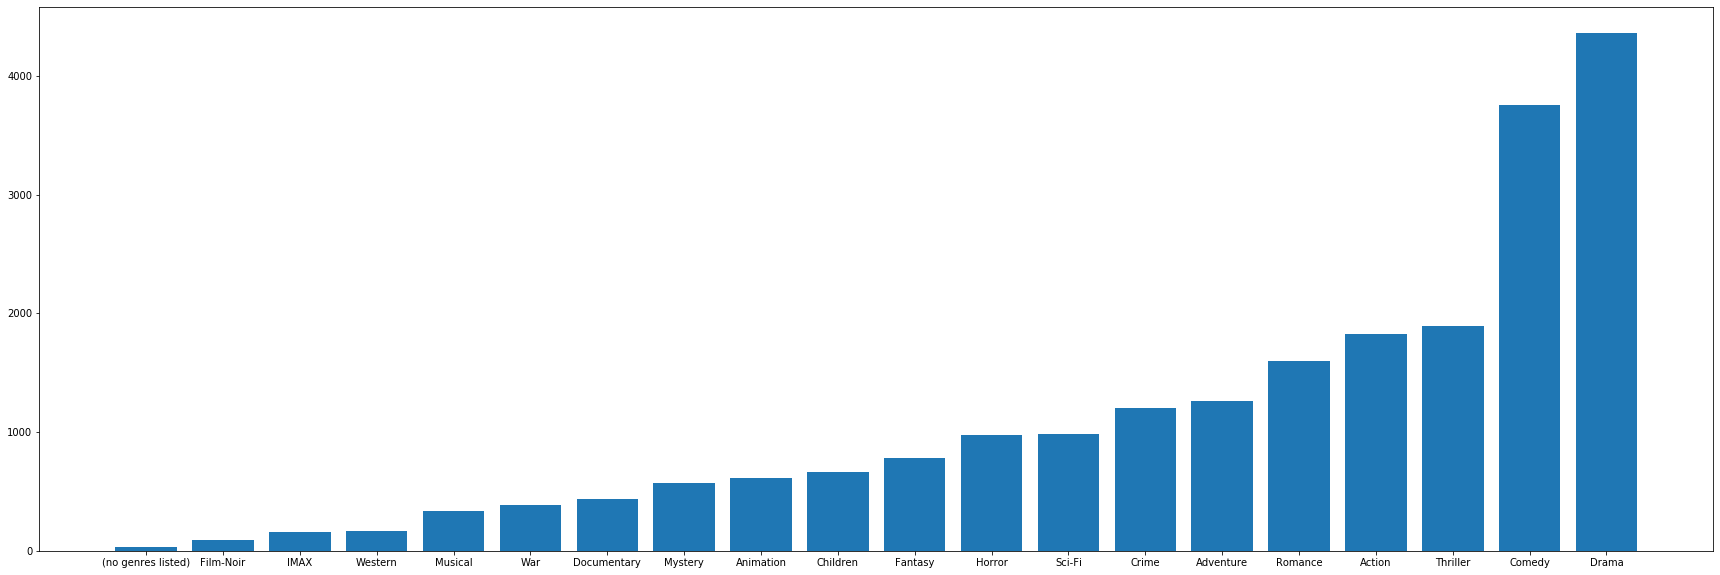

In [13]:
plt.figure(figsize=(30,10))
plt.bar(range(len(genre_dict)), list(genre_dict.values()), align='center')
plt.xticks(range(len(genre_dict)), list(genre_dict.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.show()

In [14]:
#identify genres commonly seen together (this would be good for a node chart)
from numpy import array
from scipy.linalg import svd

#First creating the initial matrix
#we want users as rows, movies as columns

rating_matrix = ratings.pivot(index = "userId", columns = "movieId", values = "rating")
rating_matrix = rating_matrix.fillna(0)
nparray = rating_matrix.to_numpy()
nparray_norm = (nparray - np.mean(nparray)) / np.std(nparray)

In [15]:
print(nparray_norm.shape)
nparray_norm

(610, 9724)


array([[ 8.33760998, -0.1259491 ,  8.33760998, ..., -0.1259491 ,
        -0.1259491 , -0.1259491 ],
       [-0.1259491 , -0.1259491 , -0.1259491 , ..., -0.1259491 ,
        -0.1259491 , -0.1259491 ],
       [-0.1259491 , -0.1259491 , -0.1259491 , ..., -0.1259491 ,
        -0.1259491 , -0.1259491 ],
       ...,
       [ 5.16377533,  4.10583044,  4.10583044, ..., -0.1259491 ,
        -0.1259491 , -0.1259491 ],
       [ 6.22172021, -0.1259491 , -0.1259491 , ..., -0.1259491 ,
        -0.1259491 , -0.1259491 ],
       [10.45349975, -0.1259491 , -0.1259491 , ..., -0.1259491 ,
        -0.1259491 , -0.1259491 ]])

In [16]:
s, v, d = np.linalg.svd(nparray_norm, compute_uv = True)

In [17]:
print(s.shape, v.shape, d.shape)
#The first users most powerful concept is:

#Find users whose "concepts" correspond to the largest eigen vector
index_of_top = []
for i in range(len(s)):
    index = np.where(s[i] == np.amax(s[i]))[0][0]
    if index == 0:
        index_of_top += [i]
#     print(list(index))

print(np.where(s[0] == np.amax(s[0]))[0])
print(type(np.where(s[0] == np.amax(s[0]))[0]))
print(type(np.amin(s[0])))
sum(s[0])
print(index_of_top)

(610, 610) (610,) (9724, 9724)
[83]
<class 'numpy.ndarray'>
<class 'numpy.float64'>
[]


In [18]:
type(d.T[0:610])
print(d.T[0:610].shape)
print(np.dot(np.dot(s,np.diag(v)), d[0:610]))
print(nparray_norm)
#Testing if numpy correctly performs SVD (it does)
#Applying result to original array
print(nparray_norm.shape)
#This should be the covariance matrix PCA for users (610 users represented by 2 attributes)
pca_mat_user = np.dot(np.dot(nparray_norm,nparray_norm.T), s[:,:2])
pca_mat_mov = np.dot(np.dot(nparray_norm.T, nparray_norm),d[:,:2])
pca_mat_user_test = np.dot(s[:,:2],np.diag(v)[:2,:2]**2)
pca_mat_mov_test = np.dot(d[:,:2],np.diag(v)[:2,:2]**2)

(610, 9724)
[[ 8.33760998 -0.1259491   8.33760998 ... -0.1259491  -0.1259491
  -0.1259491 ]
 [-0.1259491  -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]
 [-0.1259491  -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]
 ...
 [ 5.16377533  4.10583044  4.10583044 ... -0.1259491  -0.1259491
  -0.1259491 ]
 [ 6.22172021 -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]
 [10.45349975 -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]]
[[ 8.33760998 -0.1259491   8.33760998 ... -0.1259491  -0.1259491
  -0.1259491 ]
 [-0.1259491  -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]
 [-0.1259491  -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]
 ...
 [ 5.16377533  4.10583044  4.10583044 ... -0.1259491  -0.1259491
  -0.1259491 ]
 [ 6.22172021 -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]
 [10.45349975 -0.1259491  -0.1259491  ... -0.1259491  -0.1259491
  -0.1259491 ]]
(610, 9724)


In [19]:
print(s[0][0])
print(v)


-0.05651213974860059
[1051.86830807  492.65070266  470.83771998  371.33882105  326.20280597
  309.11211903  285.87492007  259.8960798   258.5832499   239.81179017
  234.24201395  228.44562213  224.32837924  215.74052321  211.54497932
  210.37722216  205.64522506  197.62422968  195.38342627  192.58768608
  191.15611499  186.30436718  184.2262184   182.07009292  180.83792238
  175.83713105  174.86927989  173.53450926  170.47306226  168.64886781
  167.27049157  166.03653438  165.31949727  162.3482464   160.32450285
  159.26158955  158.90437973  157.43489072  156.6516716   155.79741195
  155.03356     153.27577971  151.94232069  148.52616696  148.50625136
  148.06971252  147.40718142  146.37714317  144.69214191  143.64250602
  143.11466516  142.78697901  141.92979222  141.07753516  139.8308434
  138.60685856  138.13768378  137.0717038   136.24751032  135.74775335
  135.03458682  134.66097825  133.94475649  133.56357251  133.18672321
  131.83399164  130.89539426  130.39264459  130.05431448 

In [20]:
print(pca_mat_mov)
print(pca_mat_user)
print(pca_mat_user_test)
print(pca_mat_mov_test)

[[-4162.33521779  -423.95995964]
 [-1235.31546179  -576.92003447]
 [ -372.79142633  -169.53927899]
 ...
 [   53.76555732    -4.40076691]
 [   53.76555732    -4.40076691]
 [   76.21118402    14.39101203]]
[[ -62526.55371512   15623.96073751]
 [  -2808.64017619   -1858.78953874]
 [   2841.68306199    1819.9833517 ]
 ...
 [-133644.32417246    1170.27236716]
 [  -4780.11091157    6656.78800023]
 [-153677.80949393  -55266.99290624]]
[[ -62526.55371512   15623.96073751]
 [  -2808.64017619   -1858.78953874]
 [   2841.68306199    1819.9833517 ]
 ...
 [-133644.32417246    1170.27236716]
 [  -4780.11091157    6656.78800023]
 [-153677.80949393  -55266.99290623]]
[[-80295.35890795  -9531.05146987]
 [ 56038.12908223   2512.96276426]
 [ 58046.85815074   5563.57068199]
 ...
 [   156.36794387   -188.37190356]
 [   156.36794387   -188.37190356]
 [  4239.65636581    354.0984063 ]]


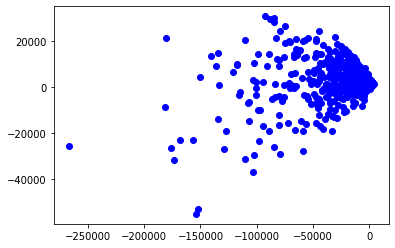

In [21]:
#Plotting PCA
#COlor by most watched film genre

plt.plot 
plt.plot(pca_mat_user[:,0], pca_mat_user[:,1], "bo")

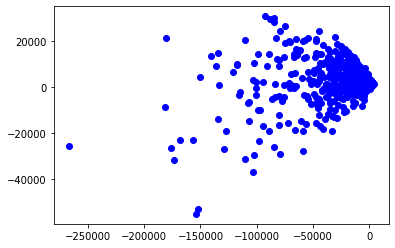

In [22]:
plt.plot(pca_mat_user_test[:,0], pca_mat_user_test[:,1], "bo")

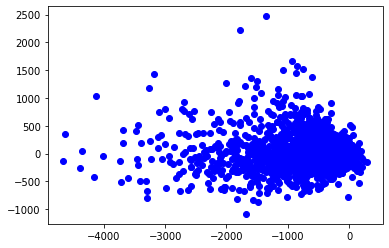

In [23]:
plt.plot(pca_mat_mov[:,0], pca_mat_mov[:,1], "bo")

In [24]:
#Perfect - SVD and PCA are working Great! - now it's time to cluster movies by genres and topics
#Back to the Movies dataset (has genres & has user tags)
#1. Identify which genres co-occur the most
#2. Identify which tags are the most correlated with which genres
#3. Identify which tags co-occur with each other
#4. Identify the n-most popular tags
#5. Use the above + extra information to identify top n movies from each cluster with the most amount of reviews 
#6. We can use them for SVD and raw PCA (for visualizing) and this information can be added to classify 

# There is a question of whether we can get sentiment from the tags? or perhaps group them into more general themes...
# May look into this...
#Tags will need lots of cleaning in order to be useful as approximately 1/2 of them are unique 
print("Number of Unique Tags: ", tags.tag.nunique())
print("Number of Unique Users: ", tags.userId.nunique())
print("Number of Unique Movies: ", tags.movieId.nunique())
print("Number of Tags: ", tags.shape[0])
tags.head()


Number of Unique Tags:  1589
Number of Unique Users:  58
Number of Unique Movies:  1572
Number of Tags:  3683


,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-25 03:29:54
1,2,60756,Highly quotable,2015-10-25 03:29:56
2,2,60756,will ferrell,2015-10-25 03:29:52
3,2,89774,Boxing story,2015-10-25 03:33:27
4,2,89774,MMA,2015-10-25 03:33:20


In [25]:
# Let's begin with Genre Analysis then
# Use Genre Analysis to group movies (we can use genres as a )
print("Number of Unique Genres: ", len(genre_dict))
movies.head()

Number of Unique Genres:  20


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
#can do a "most popular genres over time"
#Definitely do a Parallel Coordinates Chart
#Use the Radial Axis Technique to model the user tags (can switch tags based on top n-most popular)
#Likely will requires some NLP to cluster the tags...
#Can even do a geo map of release times for the movies
#Glyphs and Icon Visualization Strategy...
#Use a SPiral Chart to show movies released over time (with color corresponding to genre)

#Let's connect to IMDB API
import imdb

In [27]:
ia = imdb.IMDb()

In [28]:
movies_updated = movies.join(links, rsuffix="links")
movies_updated = movies_updated.drop('movieIdlinks', axis = 1)
movies_updated

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [29]:
#Testing API
ia.get_movie_infoset() #Provides the attributes of movies
toy_story = ia.get_movie(114709, info = ['keywords'])
# test = ia.get_movie(movies_updated.imdbId[20], info = ['release dates'])

In [30]:
# toy_story.get('keywords')

In [31]:
movies_updated["Release_Year"] = "NaN"
movies_updated.iloc[0]

movieId                                                   1
title                                      Toy Story (1995)
genres          Adventure|Animation|Children|Comedy|Fantasy
imdbId                                               114709
tmdbId                                                  862
Release_Year                                            NaN
Name: 0, dtype: object

In [32]:
#create the ranges
ranges = [(i,i+100) for i in range(0,10000,100)]

In [33]:
#Release Dates seem to return ordered (Grab, the first one)
# movies_updated.Release_Year = movies_updated.apply(lambda x : ia.get_movie(x.imdbId, info = ['release dates']).get('release dates')[0], axis = 1)
# toy_story.infoset2keys
# toy_story.get('release dates')
# start = ranges[0][0]
# stop = ranges[0][1]
# for index, row in movies_updated.iterrows():
#     if index >= start & index < stop:
#         try:
#             result = ia.get_movie(row['imdbId'], info = ['release dates']).get('release dates')[0]
#             movies_updated.loc[index, "Release_Year"] = result
#         except:
#             print("Error: ", row['title'])
#         if index % 20 == 0:
#             print("Success: ", index, movies_updated.loc[index, "Release_Year"])
#     else:
#         break

In [34]:
#Preparing Data for radial axis graph
#There needs to be some pre-processing?
#Won't work, not enough diversity in the data set
#Instead, let's focus on grouping movies by genre (and finding the relationships there...)
# What's the best way to depict the strength of the overlapping relationships graphically?
#Can split the dataframe to columns 
#What about the streangth of the relationship being a function of genres
#E.g. Toy Story may be categorized as Adventure, Animation, Children, Comedy, etc.
#and the streangth of the relationship will be a calculation of the overlapping gernes :) 
# In this case, we would have the genres as links** (What are the groups?) - assigned later via PCA?

genre_df = (movies.set_index(['movieId','title']).apply(lambda x : x.str.split('|').explode()).reset_index())

In [ ]:
print(movies.shape)
# genre_df

In [35]:
genre_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy
22080,193585,Flint (2017),Drama
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [42]:
#Getting the top most watched genres for each user
user_genres = pd.merge(ratings, genre_df, on="movieId")

In [43]:
user_genres

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-31 02:45:03,Toy Story (1995),Adventure
1,1,1,4.0,2000-07-31 02:45:03,Toy Story (1995),Animation
2,1,1,4.0,2000-07-31 02:45:03,Toy Story (1995),Children
3,1,1,4.0,2000-07-31 02:45:03,Toy Story (1995),Comedy
4,1,1,4.0,2000-07-31 02:45:03,Toy Story (1995),Fantasy
...,...,...,...,...,...,...
274475,610,160836,3.0,2017-05-04 04:53:14,Hazard (2005),Drama
274476,610,160836,3.0,2017-05-04 04:53:14,Hazard (2005),Thriller
274477,610,163937,3.5,2017-05-04 05:59:49,Blair Witch (2016),Horror
274478,610,163937,3.5,2017-05-04 05:59:49,Blair Witch (2016),Thriller


In [44]:
user_genre_dict ={}
for index, row in user_genres.iterrows():
    try:
        user_genre_dict[row['userId']]
    except:
        user_genre_dict[row['userId']] = {}
    try:
        user_genre_dict[row['userId']][row['genres']] += 1
    except:
        user_genre_dict[row['userId']][row['genres']] = 1
        

In [48]:
# user_genre_dict

In [66]:
import operator
fav_genre = {}
for key in user_genre_dict:
    maximum = max(user_genre_dict[key].items(), key = operator.itemgetter(1))[0]
    fav_genre[key] = maximum

fav_genre = pd.DataFrame.from_dict(fav_genre, orient = "index")

In [68]:
fav_genre = fav_genre.reset_index()
fav_genre.columns = ['userId','FavGenre']

In [87]:
fav_genre.FavGenre.nunique()
fav_genre
pca_df.index = np.arange(1, len(pca_df) + 1)
pca_df = pd.DataFrame(pca_mat_user)
pca_df.index = np.arange(1, len(pca_df) + 1)
pca_df = pca_df.reset_index()
pca_df.columns = ['userId', 'factor_1', 'factor_2']

In [88]:
plot_df = pd.merge(pca_df, fav_genre, on = "userId")

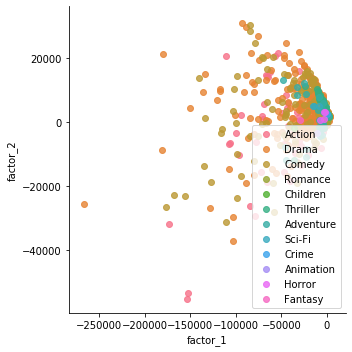

In [91]:
import seaborn as sns

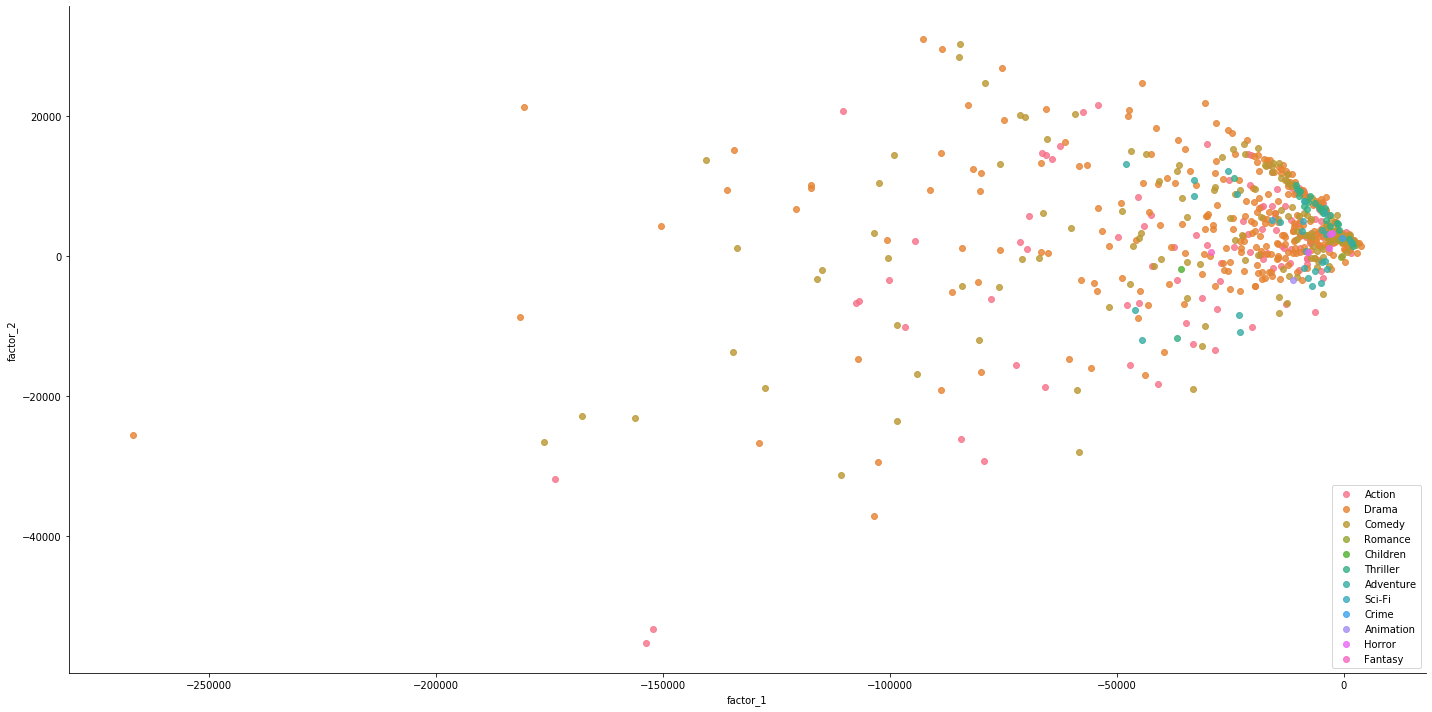

In [95]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="factor_1", y="factor_2", data=plot_df, fit_reg=False, hue='FavGenre', height = 10, aspect = 2, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


In [115]:
#What data can be pulled from IMDB?
ia.get_movie_infoset() #Provides the attributes of movies

#Movie Recommendation Visualization
#ia.get_top250_movies()

#Possible important Attributes
#1. awards
#2. connections
#3. countries
#4. keywords (This is a long list for some movies)
#5. 

#By Default IMDBpy returns (main, plot, synopsis)
toy_story = ia.get_movie('193585')


In [116]:
ia.update(toy_story, "business")

2019-11-27 11:35:57,144 ERROR [imdbpy] /usr/local/lib/python3.7/site-packages/imdb/__init__.py:728: unknown information set "business"


In [117]:
print(toy_story.infoset2keys['business'])

[]


In [67]:
ia.get_movie_infoset()

['airing',
 'akas',
 'alternate versions',
 'awards',
 'connections',
 'crazy credits',
 'critic reviews',
 'episodes',
 'external reviews',
 'external sites',
 'faqs',
 'full credits',
 'goofs',
 'keywords',
 'locations',
 'main',
 'misc sites',
 'news',
 'official sites',
 'parents guide',
 'photo sites',
 'plot',
 'quotes',
 'release dates',
 'release info',
 'reviews',
 'sound clips',
 'soundtrack',
 'synopsis',
 'taglines',
 'technical',
 'trivia',
 'tv schedule',
 'video clips',
 'vote details']

In [ ]:
# IMDB Error Handling
# from imdb import IMDb, IMDbError

# try:
#     ia = IMDb()
#     people = ia.search_person('Mel Gibson')
# except IMDbError as e:
#     print(e)

In [118]:
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = 'bbf25fae7203def03e17f79789d653c6'

In [120]:
from tmdbv3api import Movie
movie = Movie()

In [121]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [278]:
from bs4 import BeautifulSoup
import bs4
from selenium import webdriver
import pandas as pd
import numpy as np
from selenium.webdriver.chrome.options import Options
from re import sub
from decimal import Decimal


In [364]:


url = "https://www.boxofficemojo.com/year/{}/".format(2012)

def create_driver():
    browser_options = Options()
    browser_options.add_argument("--headless")
    browser_options.add_argument('--no-sandbox')
    driver = webdriver.Chrome(chrome_options=browser_options)
    print("Done Creating Browser")
    return driver


def convdollar(x):
    if 'k' in x:
        return float(x.replace('k',''))*1000
    else:
        return float(x)*1000000
    
def scrape(box_office, start, finish):
    driver = create_driver()
    years=[str(a) for a in range(start,finish)]
    df_list=[]
    for year in years:
        url = "https://www.boxofficemojo.com/year/{}/".format(year) 
        driver.get(url)
        page_content = driver.page_source
        print('Box Office data for %s scraped' % year)
        p=BeautifulSoup(page_content)
        table = p.find_all("table")
        mov_dict = {}
#         value = Decimal(sub(r'[^\d.]', '', money))
        mov_dict["rank"] = [i.getText() for i in table[1].find_all("td", { "class" : "mojo-field-type-rank"})]
        mov_dict["year"] = [year for i in range(len(mov_dict["rank"]))]
        mov_dict["movie"] = [i.getText() for i in table[1].find_all("td", { "class" : "mojo-field-type-release"})]
        mov_dict["studio"] = [i.getText().replace("\n","") for i in table[1].find_all("td", { "class" : "mojo-field-type-studio"}) if i.getText() != None]
        mov_dict["gross"] = [Decimal(sub("[^0-9a-zA-Z]+","", j)) for j in [i.getText() for i in table[1].find_all("td", { "class" : "mojo-field-type-money"})][2::3]]
        mov_dict["release"] = [i.getText() for i in table[1].find_all("td", { "class" : "mojo-field-type-date"})]
        temp_frame = pd.DataFrame(mov_dict)
        box_office = box_office.append(temp_frame, ignore_index = True)
    driver.quit()
    return box_office


In [365]:
# page_content
Decimal("251188924")

Decimal('251188924')

In [369]:
box_office = pd.DataFrame()
# columns = ["Year","Rank", "Release", "Distributor", "Gross", "Theaters", "Total Gross", "Release Date"]
print(box_office)
box_office = scrape(box_office, 1989, 2019)
cols = box_office.columns.tolist()
new_cols = cols[1:2] + cols[0:1] + cols[2:]
box_office = box_office[new_cols]

Empty DataFrame
Columns: []
Index: []


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


Done Creating Browser
Box Office data for 1989 scraped
Box Office data for 1990 scraped
Box Office data for 1991 scraped
Box Office data for 1992 scraped
Box Office data for 1993 scraped
Box Office data for 1994 scraped
Box Office data for 1995 scraped
Box Office data for 1996 scraped
Box Office data for 1997 scraped
Box Office data for 1998 scraped
Box Office data for 1999 scraped
Box Office data for 2000 scraped
Box Office data for 2001 scraped
Box Office data for 2002 scraped
Box Office data for 2003 scraped
Box Office data for 2004 scraped
Box Office data for 2005 scraped
Box Office data for 2006 scraped
Box Office data for 2007 scraped
Box Office data for 2008 scraped
Box Office data for 2009 scraped
Box Office data for 2010 scraped
Box Office data for 2011 scraped
Box Office data for 2012 scraped
Box Office data for 2013 scraped
Box Office data for 2014 scraped
Box Office data for 2015 scraped
Box Office data for 2016 scraped
Box Office data for 2017 scraped
Box Office data for 2

In [370]:
box_office.to_csv("Box_Office_Data_1989_2018.csv")

In [1]:
box_office = pd.read_csv("Box_Office_Data_1989_2018.csv")
box_office["gross"] = box_office.gross.astype('float')
box_office = box_office.drop(["Unnamed: 0"], axis = 1)

NameError: name 'pd' is not defined

In [410]:
#Ready for Visualization
box_office[box_office["year"] == 2018]
#We can go by month with the visual

,year,rank,movie,studio,gross,release
12233,2018,1,Black Panther,Walt Disney Studios Motion Pictures,700059566.0,Feb 16
12234,2018,2,Avengers: Infinity War,Walt Disney Studios Motion Pictures,678815482.0,Apr 27
12235,2018,3,The Incredibles 2,Walt Disney Studios Motion Pictures,608581744.0,Jun 15
12236,2018,4,Jurassic World: Fallen Kingdom,Universal Pictures,417719760.0,Jun 22
12237,2018,5,Deadpool 2,Twentieth Century Fox,318491426.0,May 18
...,...,...,...,...,...,...
13149,2018,917,Ridge Runners,Indican Pictures,25183.0,Jan 19
13150,2018,918,Husband Material,Eros International,567417.0,Sep 14
13151,2018,919,Born to Be Wild,Warner Bros.,25921547.0,Apr 8
13152,2018,920,The Family,Film Movement,3696.0,Aug 3


In [412]:
box_office.studio.nunique() #570 unique studios
box_office.studio.unique() #We Will visualize the largest (n) studios, 10 or 15
#and group the others in (other) - whatever sums up to what we need in a visualization


array(['Warner Bros.', 'Paramount Pictures', 'Columbia Pictures',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures', '-',
       'Twentieth Century Fox', 'United Artists', 'Orion Pictures',
       'Avenue Pictures Productions', 'New Line Cinema',
       'Metro-Goldwyn-Mayer (MGM)', 'Cinecom Pictures', 'Roxie Releasing',
       'New World Pictures', 'Taurus Entertainment Company',
       'Corsair Pictures', 'New Century', 'Four Seasons',
       'The Samuel Goldwyn Company', 'Orion Classics', 'Skouras Pictures',
       'Hemdale', 'First Run', 'Vestron Pictures', 'Miramax',
       'Apollo Associates', 'Triumph Releasing Corporation',
       'Island Pictures', 'Alive Films', 'Trimark Pictures',
       'Sony Pictures Releasing', 'Concorde Pictures', 'Troma',
       'Aries Films', 'Rainbow Releasing', 'Academy Entertainment',
       'Castle Hill Productions', 'Fine Line Features',
       'Expanded Entertainment', 'Triton Pictures', 'Circle Films',
       'October Films', 'So